In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
list_columns = ['training_time','prediction_time', 'mean_MAE', 'r2', 'mean_RMSE', 'mean_MAPE', 'mean_rMAE']

Concatenamos todos los resultados de los modelos para obtener un dataframe con todos los resultados


In [3]:
df_base_lstm = pd.read_csv('lstm_model/bases_model/df_results_bases.csv')
df_base_lstm.drop(df_base_lstm.columns[0], axis=1, inplace=True)
df_base_cnn = pd.read_csv('cnn_model/bases_model/df_results_bases.csv')
df_base_cnn.drop(df_base_cnn.columns[0], axis=1, inplace=True)
df_base_enconder = pd.read_csv('enconder_model/bases_model/df_results_bases.csv')
df_base_enconder.drop(df_base_enconder.columns[0], axis=1, inplace=True)
df_bases = pd.concat([df_base_lstm, df_base_cnn, df_base_enconder], axis=0)
df_bases

,trainig_size,model,type,training_time,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
0,0.7,lstm,base,152.689480,3.882208,0.015195,0.022343,0.025872,27.398119,0.894865,52.136466,12.793539,3.045625
1,0.8,lstm,base,151.128558,4.402499,0.015742,0.029643,0.026446,27.867695,0.889369,53.483087,12.783056,3.097700
2,0.9,lstm,base,114.740002,8.506740,0.017246,0.017422,0.035576,37.010263,0.863358,67.379821,15.323598,3.036366
0,0.7,cnn,base,55.079787,1.848856,0.015293,0.022583,0.026452,27.738144,0.890495,53.208902,12.397764,3.083422
1,0.8,cnn,base,87.598425,2.277467,0.014995,0.028389,0.025722,26.890531,0.896523,51.724993,12.262885,2.989081
2,0.9,cnn,base,92.577044,1.340297,0.016557,0.017137,0.034942,36.230413,0.870313,65.642647,15.006476,2.972386
0,0.7,transformer,base,271.141982,2.467109,0.004185,0.006096,0.006988,12.678758,0.964162,30.432660,5.697695,NaN
1,0.8,transformer,base,301.630089,2.234354,0.004303,0.007743,0.007017,12.897844,0.964049,30.481191,5.776222,NaN
2,0.9,transformer,base,139.830219,1.147879,0.004751,0.004712,0.009804,18.347335,0.952890,39.530464,7.343361,NaN


In [4]:
df_tunning_lstm = pd.read_csv('lstm_model/tunning_save/df_results_best.csv')
df_tunning_lstm.drop(df_tunning_lstm.columns[0], axis=1, inplace=True)
df_tunning_cnn = pd.read_csv('cnn_model/tunning_save/df_results_best.csv')
df_tunning_cnn.drop(df_tunning_cnn.columns[0], axis=1, inplace=True)
df_tunning_enconder = pd.read_csv('enconder_model/tunning_save/df_results_best.csv')
df_tunning_enconder.drop(df_tunning_enconder.columns[0], axis=1, inplace=True)
df_tunnings = pd.concat([df_tunning_lstm, df_tunning_cnn, df_tunning_enconder], axis=0)
df_tunnings.drop(df_tunnings.columns[0], axis=1, inplace=True)
df_tunnings

,trainig_size,model,type,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE,architecture,training_time
0,0.7,lstm,tunning,3.014056,0.015780,0.022292,0.026847,29.590811,0.903465,49.958640,13.404895,3.289368,"[(32, 'units'), (0.0009, 'lr'), (0.43239886984...",189.566262
1,0.8,lstm,tunning,4.381839,0.016367,0.029638,0.027187,29.048055,0.892093,52.820466,13.672403,3.228905,"[(64, 'units'), (1.8121807387928878e-05, 'lr')...",232.484873
2,0.9,lstm,tunning,5.499035,0.015121,0.016051,0.031310,32.586721,0.898874,57.965274,13.100258,2.673454,"[(64, 'units'), (0.00047857736313258644, 'lr')...",1171.779945
0,0.7,cnn,tunning,2.155071,0.014753,0.019449,0.024197,25.760798,0.917049,46.310251,13.153035,2.863617,"[(96, 'filters'), (5, 'kernel_size'), (4, 'poo...",260.732038
1,0.8,cnn,tunning,4.783218,0.014622,0.024668,0.023930,24.560300,0.917233,46.260159,11.353695,2.730058,"[(32, 'filters'), (3, 'kernel_size'), (2, 'poo...",489.633888
2,0.9,cnn,tunning,1.393467,0.016490,0.017285,0.031407,32.107211,0.900648,57.454743,14.413635,2.634114,"[(96, 'filters'), (3, 'kernel_size'), (2, 'poo...",267.271565
0,0.7,transformer,tunning,4.319690,0.004304,0.006191,0.007225,13.546108,0.962736,31.032234,5.899985,NaN,"[[(64, 'head_size'), (2, 'num_heads'), (1, 'ff...",256.998935
1,0.8,transformer,tunning,2.414063,0.004216,0.007718,0.006872,12.075787,0.964701,30.203517,5.314426,NaN,"[[(32, 'head_size'), (2, 'num_heads'), (3, 'ff...",243.136340
2,0.9,transformer,tunning,1.630778,0.004680,0.004425,0.009348,16.367750,0.953912,39.099295,6.595585,NaN,"[[(128, 'head_size'), (1, 'num_heads'), (3, 'f...",281.724012


In [5]:
# Obtenemos en un dataframe los datos de las bases y tunings
df_all = pd.concat([df_bases, df_tunnings[df_bases.columns]], axis=0)
df_all

,trainig_size,model,type,training_time,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
0,0.7,lstm,base,152.689480,3.882208,0.015195,0.022343,0.025872,27.398119,0.894865,52.136466,12.793539,3.045625
1,0.8,lstm,base,151.128558,4.402499,0.015742,0.029643,0.026446,27.867695,0.889369,53.483087,12.783056,3.097700
2,0.9,lstm,base,114.740002,8.506740,0.017246,0.017422,0.035576,37.010263,0.863358,67.379821,15.323598,3.036366
0,0.7,cnn,base,55.079787,1.848856,0.015293,0.022583,0.026452,27.738144,0.890495,53.208902,12.397764,3.083422
1,0.8,cnn,base,87.598425,2.277467,0.014995,0.028389,0.025722,26.890531,0.896523,51.724993,12.262885,2.989081
2,0.9,cnn,base,92.577044,1.340297,0.016557,0.017137,0.034942,36.230413,0.870313,65.642647,15.006476,2.972386
0,0.7,transformer,base,271.141982,2.467109,0.004185,0.006096,0.006988,12.678758,0.964162,30.432660,5.697695,NaN
1,0.8,transformer,base,301.630089,2.234354,0.004303,0.007743,0.007017,12.897844,0.964049,30.481191,5.776222,NaN
2,0.9,transformer,base,139.830219,1.147879,0.004751,0.004712,0.009804,18.347335,0.952890,39.530464,7.343361,NaN
0,0.7,lstm,tunning,189.566262,3.014056,0.015780,0.022292,0.026847,29.590811,0.903465,49.958640,13.404895,3.289368


In [10]:
# Creamos una nueva columna para mejorar los resultados
df_all['configuration'] = df_all.apply(lambda row: f"{row['trainig_size']*100} - {row['model'].capitalize()} - {row['type'].capitalize()}", axis=1)
df_all['indice'] = list(range(1, len(df_all)+1))

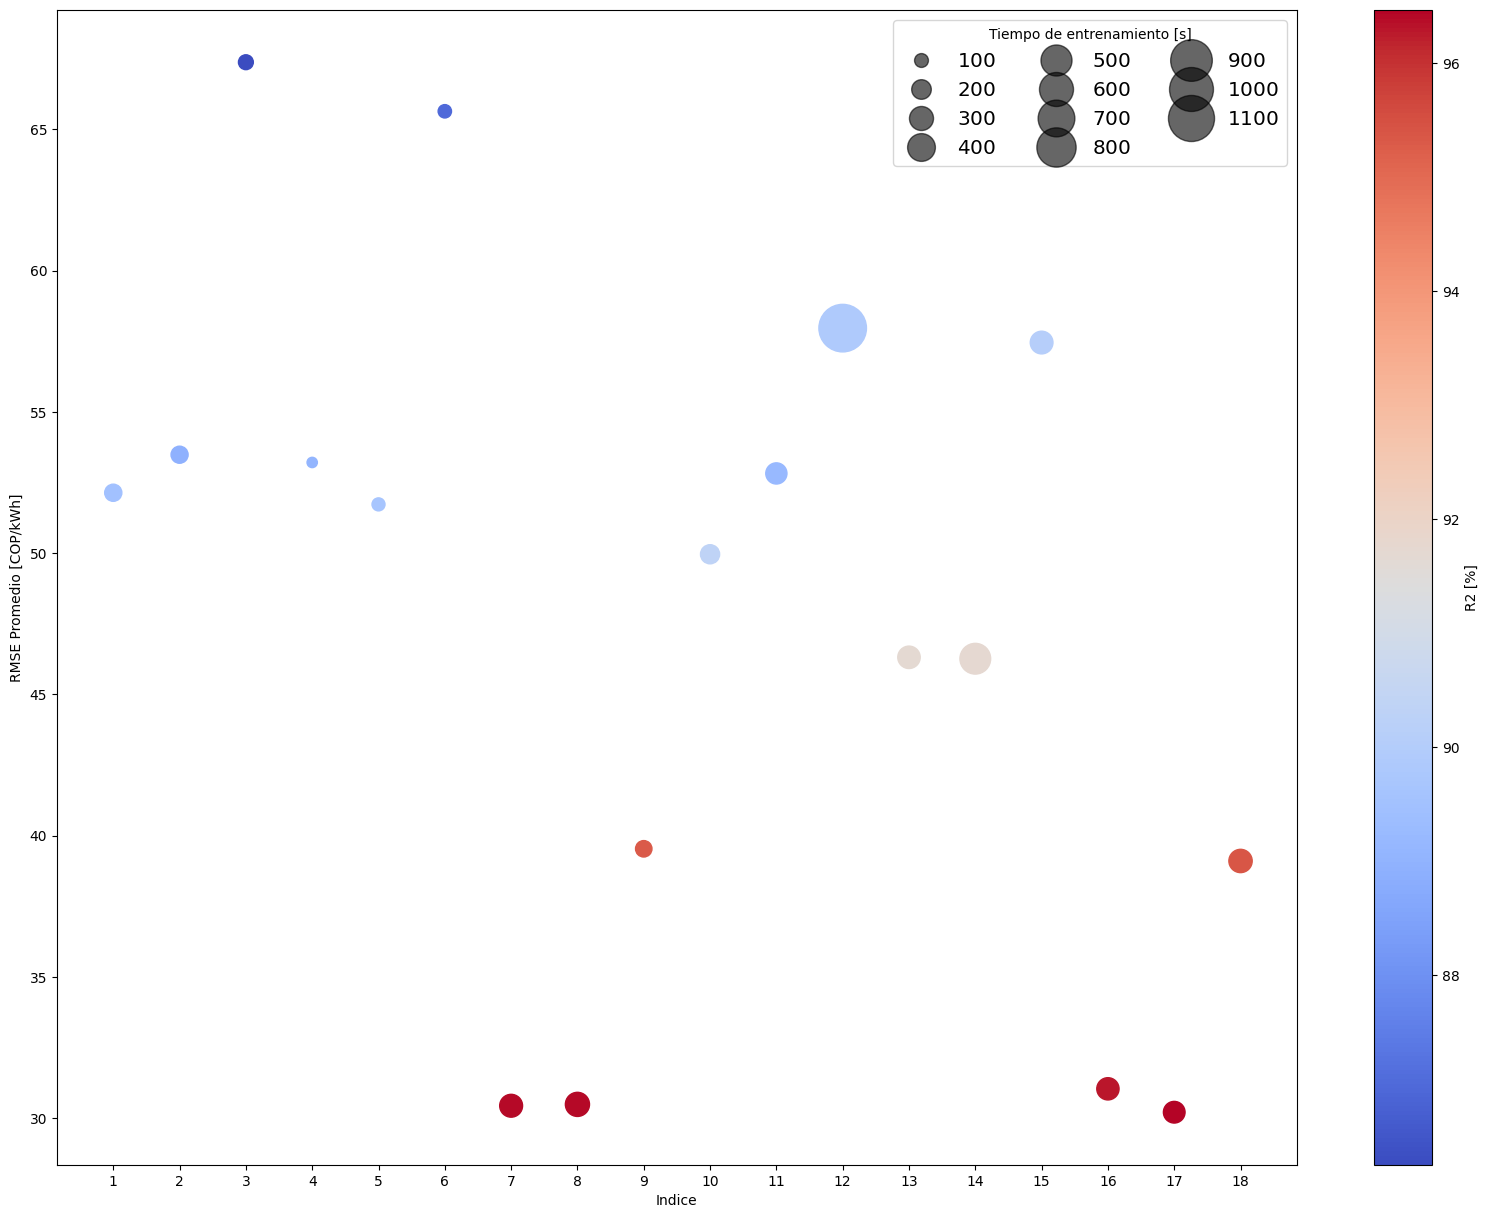

In [19]:
# Graficamos en un solo grafico las configuraciones con mejor R2, RMSE y tiempo de entrenamiento
x = df_all['indice']
y = df_all['mean_RMSE']
colors = df_all['r2'] * 100
sizes = df_all['training_time']

# Crear el heatmap
fig, ax = plt.subplots(figsize=(20, 15))
sc = ax.scatter(x, y, c=colors, s=sizes, cmap='coolwarm')
plt.xticks(range(1, 19), rotation='horizontal')
# Agregar una barra de color
cbar = plt.colorbar(sc, label='R2 [%]')


handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Tiempo de entrenamiento [s]", ncols = 3, fontsize = 'x-large')

# Configurar los ejes y etiquetas
ax.set_xlabel('Indice')
ax.set_ylabel('RMSE Promedio [COP/kWh]')

# Mostrar el gráfico
plt.show()

Análisis promedio por cada tipo de configuración

In [11]:
df_results_trainig_size = df_all.groupby(['type'])[list_columns].mean()
df_results_trainig_size

,training_time,prediction_time,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
type,,,,,,,
base,151.823954,3.123046,25.228789,0.909558,49.335581,11.042733,3.037430
tunning,377.036429,3.287913,23.960393,0.923412,45.678287,10.767546,2.903253


In [12]:
df_results_trainig_size = df_all.groupby(['model'])[list_columns].mean()
df_results_trainig_size

,training_time,prediction_time,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
model,,,,,,,
cnn,208.815458,2.299729,28.881233,0.898710,53.433616,13.097915,2.878780
lstm,335.398187,4.947730,30.583611,0.890337,55.623959,13.512958,3.061903
transformer,249.076929,2.368979,14.318930,0.960408,33.463227,6.104545,NaN


In [14]:
df_results_trainig_size = df_all.groupby(['trainig_size'])[list_columns].mean()
df_results_trainig_size

,training_time,prediction_time,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
trainig_size,,,,,,,
0.7,197.701414,2.947832,22.785456,0.922129,43.846526,10.557819,3.070508
0.8,250.935362,3.415573,22.223368,0.920661,44.162235,10.193781,3.011436
0.9,344.653798,3.253033,28.774949,0.906666,54.512041,11.963819,2.829080


In [15]:
df_results_trainig_size = df_all.groupby(['trainig_size', 'model', 'type'])[list_columns].mean()
df_results_trainig_size

training_time  prediction_time   mean_MAE  \
trainig_size model       type                                                 
0.7          cnn         base         55.079787         1.848856  27.738144   
                         tunning     260.732038         2.155071  25.760798   
             lstm        base        152.689480         3.882208  27.398119   
                         tunning     189.566262         3.014056  29.590811   
             transformer base        271.141982         2.467109  12.678758   
                         tunning     256.998935         4.319690  13.546108   
0.8          cnn         base         87.598425         2.277467  26.890531   
                         tunning     489.633888         4.783218  24.560300   
             lstm        base        151.128558         4.402499  27.867695   
                         tunning     232.484873         4.381839  29.048055   
             transformer base        301.630089         2.234354  12.897844   
                         tunning     243.136340         2.414063  12.075787   
0.9          cnn         base         92.577044         1.340297  36.230413   
                         tunning     267.271565         1.393467  32.107211   
             lstm        base        114.740002         8.506740  37.010263   
                         tunning    1171.779945         5.499035  32.586721   
             transformer base        139.830219         1.147879  18.347335   
                         tunning     281.724012         1.630778  16.367750   

                                        r2  mean_RMSE  mean_MAPE  mean_rMAE  
trainig_size model       type                                                
0.7          cnn         base     0.890495  53.208902  12.397764   3.083422  
                         tunning  0.917049  46.310251  13.153035   2.863617  
             lstm        base     0.894865  52.136466  12.793539   3.045625  
                         tunning  0.903465  49.958640  13.404895   3.289368  
             transformer base     0.964162  30.432660   5.697695        NaN  
                         tunning  0.962736  31.032234   5.899985        NaN  
0.8          cnn         base     0.896523  51.724993  12.262885   2.989081  
                         tunning  0.917233  46.260159  11.353695   2.730058  
             lstm        base     0.889369  53.483087  12.783056   3.097700  
                         tunning  0.892093  52.820466  13.672403   3.228905  
             transformer base     0.964049  30.481191   5.776222        NaN  
                         tunning  0.964701  30.203517   5.314426        NaN  
0.9          cnn         base     0.870313  65.642647  15.006476   2.972386  
                         tunning  0.900648  57.454743  14.413635   2.634114  
             lstm        base     0.863358  67.379821  15.323598   3.036366  
                         tunning  0.898874  57.965274  13.100258   2.673454  
             transformer base     0.952890  39.530464   7.343361        NaN  
                         tunning  0.953912  39.099295   6.595585        NaN

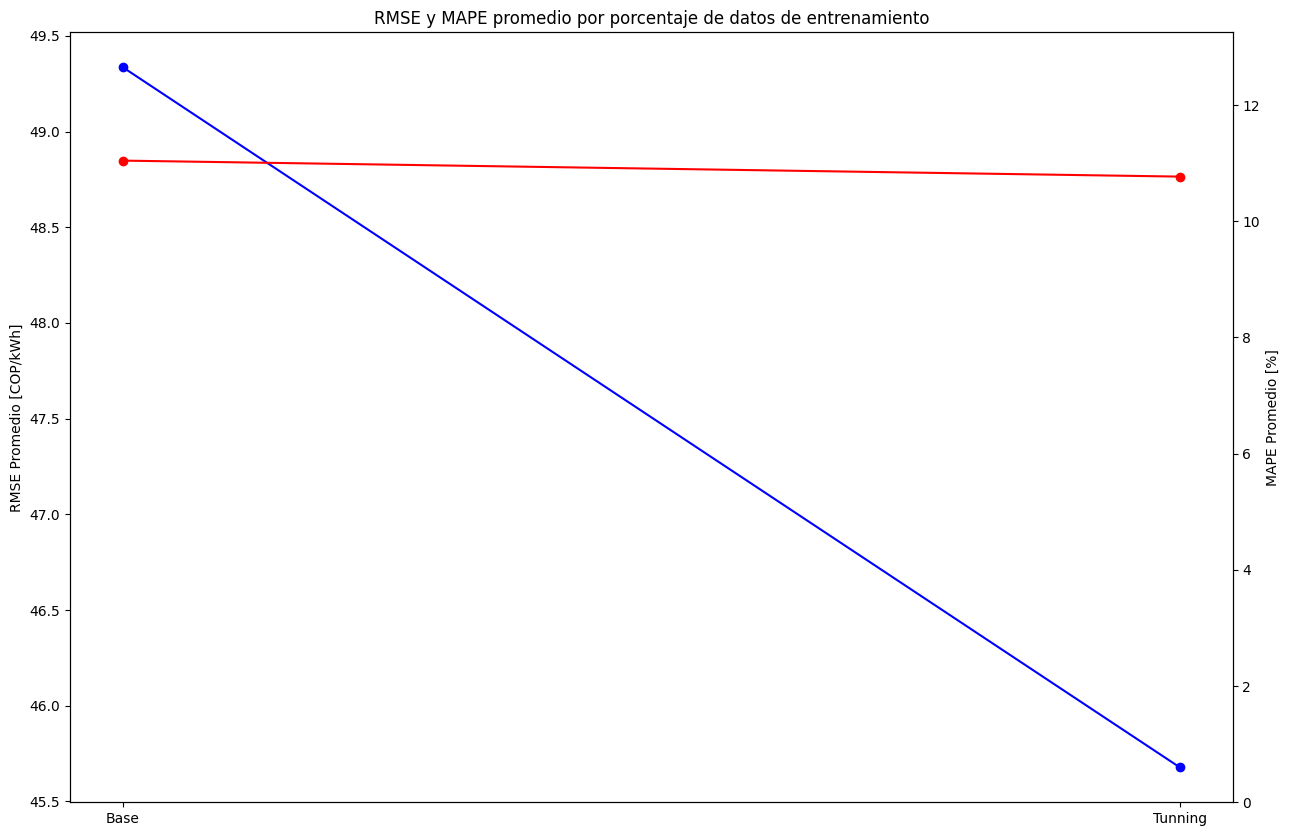

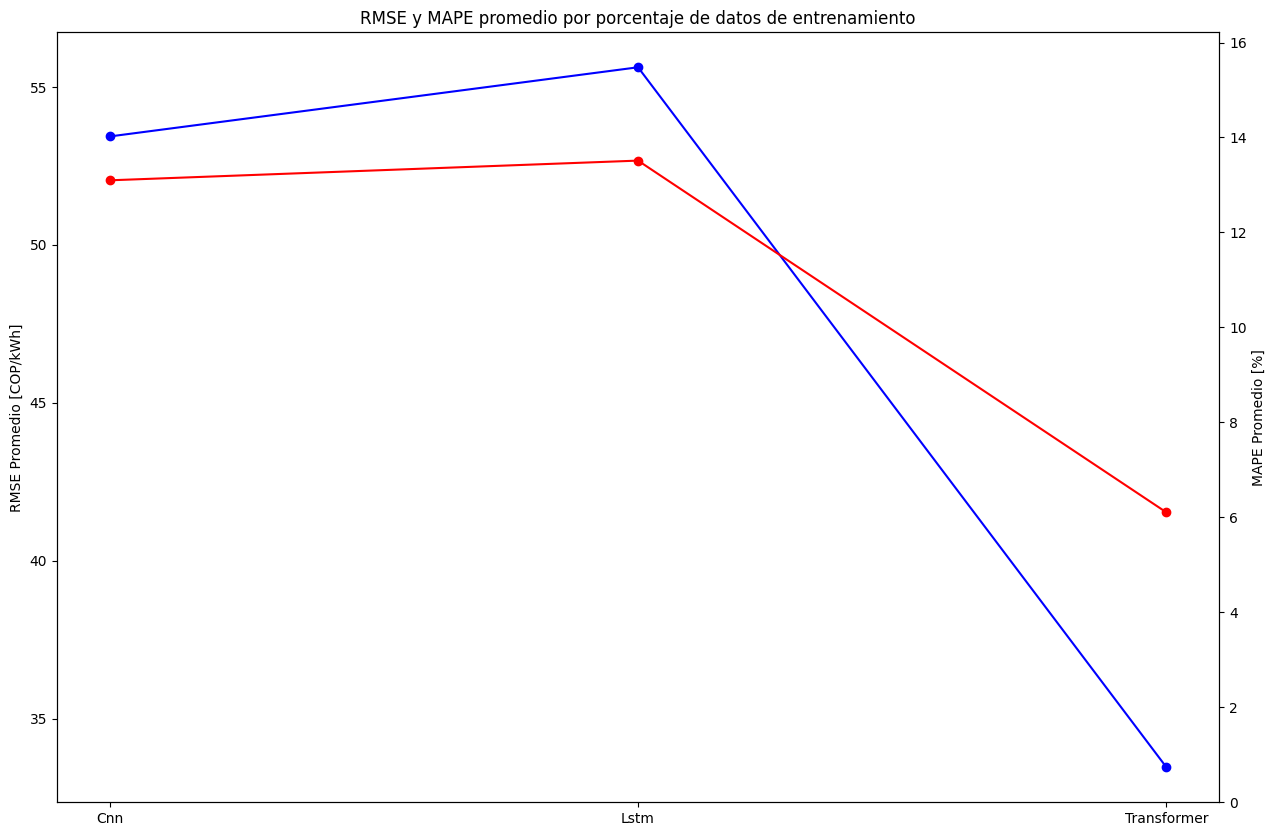

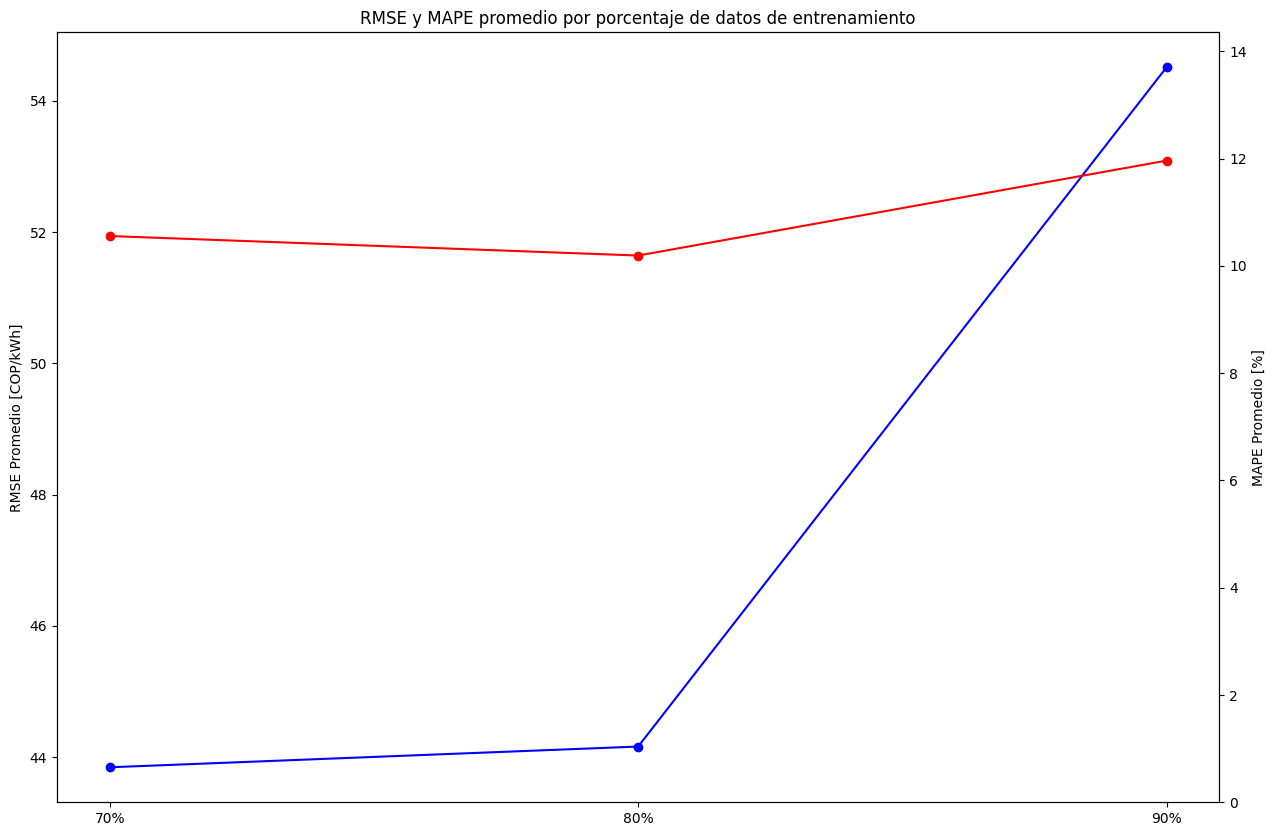

In [18]:
# Grafica de training_time vs mean RMSE cada uno con su eje
# RMSE vs MAPE de linea y cada una con su eje
for i in ['type', 'model', 'trainig_size']:
    df_results_trainig_size = df_all.groupby([i])[list_columns].mean()
    variable1 = df_results_trainig_size['mean_RMSE']
    variable2 = df_results_trainig_size['mean_MAPE']
    if i == 'trainig_size':
        etiquetas = ['{}%'.format(int(p * 100)) for p in df_results_trainig_size.index]
    else:
        etiquetas = [x.capitalize() for x in df_results_trainig_size.index]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Graficar la variable 1 como barras
    ax1.plot(etiquetas, variable1, color='blue', marker='o')
    ax1.set_ylabel('RMSE Promedio [COP/kWh]')
    ax1.tick_params('y')

    # Crear un segundo eje y graficar la variable 2 como línea y puntos
    ax2 = ax1.twinx()
    ax2.plot(etiquetas, variable2, color='red', marker='o')
    ax2.set_ylabel('MAPE Promedio [%]')
    ax2.tick_params('y')

    # Añadir etiquetas y título al gráfico
    plt.xlabel('Categorías')
    plt.title('RMSE y MAPE promedio por porcentaje de datos de entrenamiento')

    # Ajustar los límites del eje y para la variable 2
    ax2.set_ylim([0, max(variable2)*1.2])

    # Mostrar el gráfico
    plt.show()